## Load libraries

In [19]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd

# Libraries to cluster data
from sklearn.cluster import AgglomerativeClustering

# Libraries to visualize data
# import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import visualize_cluster  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

%matplotlib inline

## Configurate and declare global variables

In [8]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886

## Import data

In [9]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
title_docs = pd.read_csv(OUTPUT_DIR + "title_docs.csv")

## Check imported data

In [10]:
title_embeddings.shape, title_docs.shape

((18992, 300), (18992, 2))

## Clustering data

### Wald

In [11]:
X = title_embeddings

# plt.figure(figsize=(10, 7))
# plt.title("Dendrograms")
# dend = shc.dendrogram(shc.linkage(X, method="ward"))
# plt.axhline(y=6, color='r', linestyle='--')

In [27]:
def wald_cluster(X, n):
    clusterer = AgglomerativeClustering(
        n_clusters=n, affinity="euclidean", linkage="ward"
    )
    clusterer.fit(X)
    return clusterer

In [28]:
n_range = range(10, 220, 20)
model_list = []
len(n_range), list(n_range)

(11, [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210])

In [30]:
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

tqdm_bar = tqdm(desc="Tuning Wald Clustering", total=len(n_range))
for n in n_range:
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer = wald_cluster(X, n)

    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    model_list.append(clusterer)
    print()
    tqdm_bar.update(1)
tqdm_bar.close()
end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

Tuning Wald Clustering:   0%|                              | 0/11 [00:00<?, ?it/s]

Start loop 2021-04-28 22:44:49.321465
Start 2021-04-28 22:44:49.335469


Tuning Wald Clustering:   9%|█▉                   | 1/11 [01:54<19:05, 114.51s/it]

End 2021-04-28 22:46:43.822374
Duration 0:01:54.486905

Start 2021-04-28 22:46:43.897377


Tuning Wald Clustering:  18%|████                  | 2/11 [03:19<14:36, 97.42s/it]

End 2021-04-28 22:48:09.292640
Duration 0:01:25.395263

Start 2021-04-28 22:48:09.348677


Tuning Wald Clustering:  27%|█████▋               | 3/11 [05:54<16:28, 123.50s/it]

End 2021-04-28 22:50:43.810753
Duration 0:02:34.462076

Start 2021-04-28 22:50:43.907754


Tuning Wald Clustering:  36%|███████▋             | 4/11 [08:22<15:31, 133.11s/it]

End 2021-04-28 22:53:11.685995
Duration 0:02:27.778241

Start 2021-04-28 22:53:11.691003


Tuning Wald Clustering:  45%|█████████▌           | 5/11 [10:48<13:46, 137.76s/it]

End 2021-04-28 22:55:37.697228
Duration 0:02:26.006225

Start 2021-04-28 22:55:37.700227


Tuning Wald Clustering:  55%|███████████▍         | 6/11 [13:16<11:45, 141.19s/it]

End 2021-04-28 22:58:05.527468
Duration 0:02:27.827241

Start 2021-04-28 22:58:05.529464


Tuning Wald Clustering:  64%|█████████████▎       | 7/11 [15:47<09:37, 144.41s/it]

End 2021-04-28 23:00:36.586704
Duration 0:02:31.057240

Start 2021-04-28 23:00:36.588703


Tuning Wald Clustering:  73%|███████████████▎     | 8/11 [18:13<07:14, 144.98s/it]

End 2021-04-28 23:03:02.783937
Duration 0:02:26.195234

Start 2021-04-28 23:03:02.785936


Tuning Wald Clustering:  82%|█████████████████▏   | 9/11 [20:05<04:29, 134.77s/it]

End 2021-04-28 23:04:55.093117
Duration 0:01:52.307181

Start 2021-04-28 23:04:55.095149


Tuning Wald Clustering:  91%|██████████████████▏ | 10/11 [21:27<01:58, 118.55s/it]

End 2021-04-28 23:06:17.321248
Duration 0:01:22.226099

Start 2021-04-28 23:06:17.323261


Tuning Wald Clustering: 100%|████████████████████| 11/11 [23:23<00:00, 127.59s/it]

End 2021-04-28 23:08:12.736430
Duration 0:01:55.413169

End loop 2021-04-28 23:08:12.817654
Duration 0:23:23.496189


In [31]:
calhar_scores = []
davbou_scores = []
silho_scores = []
for i in tqdm(range(len(model_list))):
    cluster_labels = model_list[i].labels_
    try:
        silhouette_score = metrics.silhouette_score(X, cluster_labels)
    except Exception as error:
        silhouette_score = -2
        print(error)
    try:
        ch_score = metrics.calinski_harabasz_score(X, cluster_labels)
    except Exception as error:
        ch_score = -2
        print(error)
    try:
        db_score = metrics.davies_bouldin_score(X, cluster_labels)
    except Exception as error:
        db_score = -2
        print(error)

    silho_scores.append(silhouette_score)
    calhar_scores.append(ch_score)
    davbou_scores.append(db_score)

100%|█████████████████████████████████████████████| 11/11 [01:24<00:00,  7.72s/it]


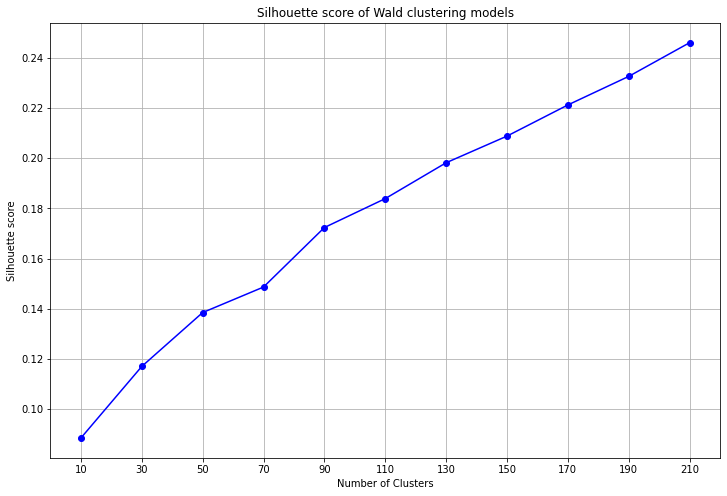

In [32]:
# Plot the Silhouette score
plt.figure(figsize=(12, 8))
plt.plot(n_range, silho_scores, "o-", color="blue")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette score")
plt.xticks(n_range)
plt.title("Silhouette score of Wald clustering models")
plt.grid()

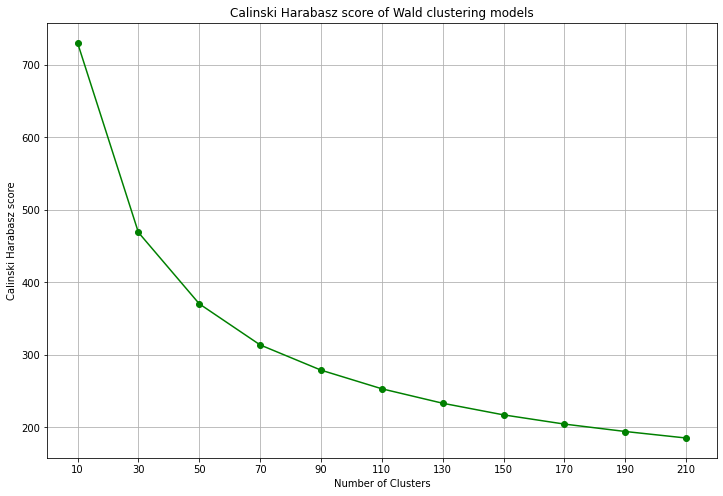

In [33]:
# Plot the Silhouette score
plt.figure(figsize=(12, 8))
plt.plot(n_range, calhar_scores, "o-", color="green")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski Harabasz score")
plt.xticks(n_range)
plt.title("Calinski Harabasz score of Wald clustering models")
plt.grid()

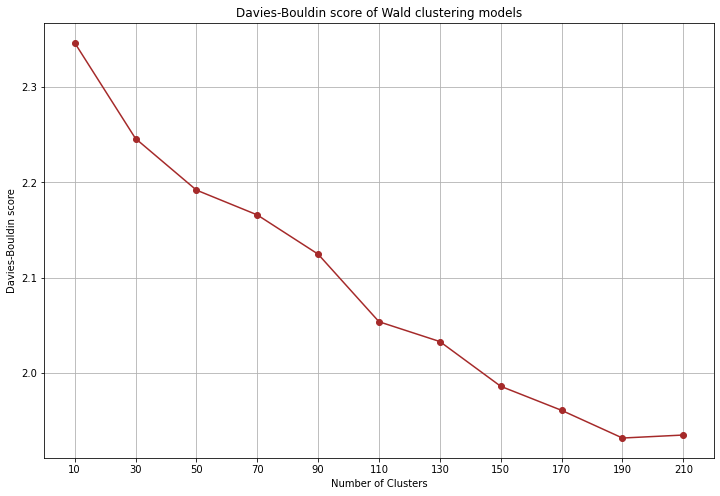

In [34]:
# Plot the Silhouette score
plt.figure(figsize=(12, 8))
plt.plot(n_range, davbou_scores, "o-", color="brown")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.xticks(n_range)
plt.title("Davies-Bouldin score of Wald clustering models")
plt.grid()

In [38]:
best_index = np.argmax(np.asarray(silho_scores))
best_n = n_range[best_index]
best_labels = model_list[best_index].labels_
print(f'Optimal number of clusters = {best_n}')

Optimal number of clusters = 210


In [36]:
df_clusters = pd.DataFrame(
    {
        "text": title_docs["job_title"].values.tolist(),
        "tokens": title_docs["clean_job_title"].values.tolist(),
        "cluster": best_labels
    }
)

In [37]:
df_clusters

,text,tokens,cluster
0,Chief Financial Officer,"['chief', 'financial', 'officer']",146
1,Full-time Community Connections Intern (paid i...,"['full', 'time', 'community', 'connection', 'i...",15
2,Country Coordinator,"['country', 'coordinator']",202
3,BCC Specialist,"['bcc', 'specialist']",31
4,Software Developer,"['software', 'developer']",143
...,...,...,...
18987,Senior Creative UX/ UI Designer,"['senior', 'creative', 'ux', 'ui', 'designer']",176
18988,Category Development Manager,"['category', 'development', 'manager']",124
18989,Operational Marketing Manager,"['operational', 'marketing', 'manager']",97
18990,Head of Online Sales Department,"['head', 'online', 'sale', 'department']",8


In [39]:
df_clusters.to_csv(OUTPUT_DIR + "job-title-clusters_wald.csv", index=False)

In [40]:
pca_datapoint = np.load(OUTPUT_DIR + "pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "tsne_datapoints.npy")

Start PCA 2021-04-28 23:13:46.592477
End PCA 2021-04-28 23:13:46.598476
PCA duration 0:00:00.005999

Start t-SNE 2021-04-28 23:13:46.598476
End t-SNE 2021-04-28 23:13:46.605478
t-SNE duration 0:00:00.007002



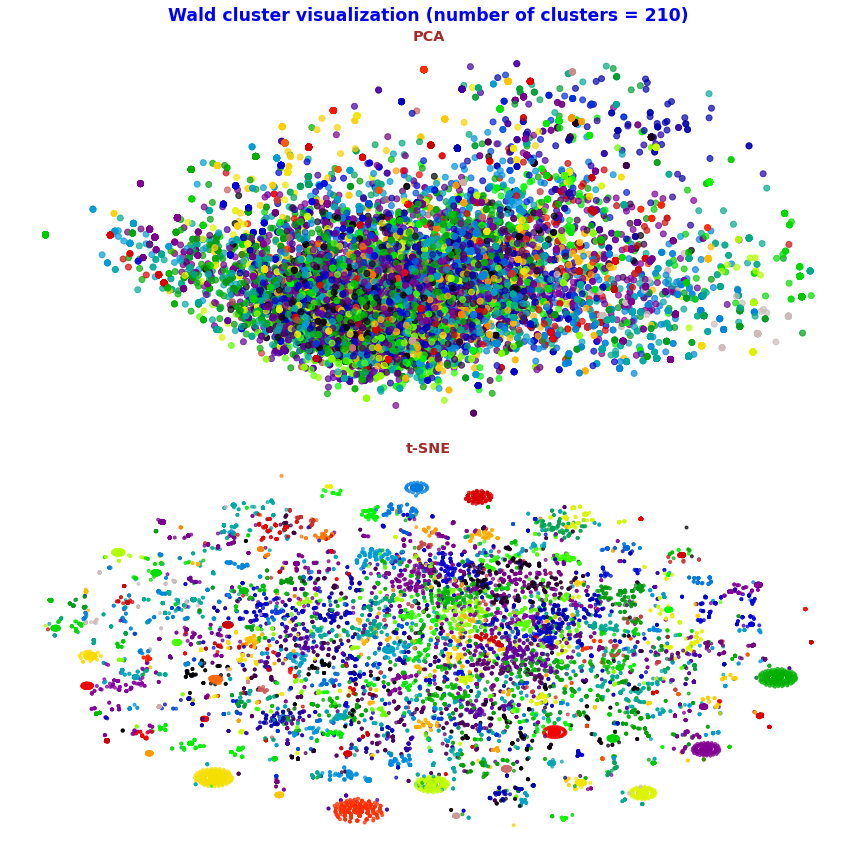

In [41]:
plot_title = f"Wald cluster visualization (number of clusters = {best_n})"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(best_labels.astype(float) / best_n)

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_title,
    (12, 12),
    colors,
    palette,
    pca_datapoint,
    tsne_datapoint,
    pca=True,
    tsne=True,
)